In [ ]:
from sqlalchemy import create_engine
import os
import numpy as np
import pandas as pd
from dotenv import load_dotenv

def create_connection():

    load_dotenv()
    host = os.environ.get('DB_DESTINATION_HOST')
    port = os.environ.get('DB_DESTINATION_PORT')
    db = os.environ.get('DB_DESTINATION_NAME')
    username = os.environ.get('DB_DESTINATION_USER')
    password = os.environ.get('DB_DESTINATION_PASSWORD')

    conn = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db}')
    return conn

# устанавливаем соединение с базой
conn = create_connection()

In [2]:
data = pd.read_sql('select * from flats_buildings', conn)
print(f'data shape = {data.shape}')
data.head()

data shape = (141362, 17)


,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
0,36985,6,False,8.0,0.000000,3,False,59.099998,11350000,1972,4,55.616169,37.498852,2.64,427,9,True
1,36986,13,False,12.0,44.000000,3,False,74.000000,12950000,2013,4,55.701359,37.927059,2.74,384,17,True
2,36987,17,False,10.2,0.000000,3,False,76.099998,13600000,1990,4,55.568478,37.584217,2.64,328,17,True
3,36988,9,False,6.0,0.000000,3,False,59.000000,12300000,1972,4,55.623585,37.503395,2.60,287,9,True
4,36989,7,False,10.0,44.099998,3,False,64.199997,13800000,1968,6,55.819077,37.584900,2.64,84,12,True


In [3]:
features = data.drop(columns=['id', 'price', 'studio']) # удаляем studio т.к. в данных только значение false для данного поля
print(features.dtypes.value_counts())

int64      6
float64    6
bool       2
Name: count, dtype: int64


In [4]:
num_features = features.select_dtypes(include=['float', 'int']).drop(columns=['building_type_int'])
cat_features = features[['building_type_int']]
bool_features = features.select_dtypes(include='bool')

count    1.413620e+05
mean     1.944162e+07
std      6.626954e+07
min      1.100000e+01
25%      8.900000e+06
50%      1.185000e+07
75%      1.695000e+07
max      9.873738e+09
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

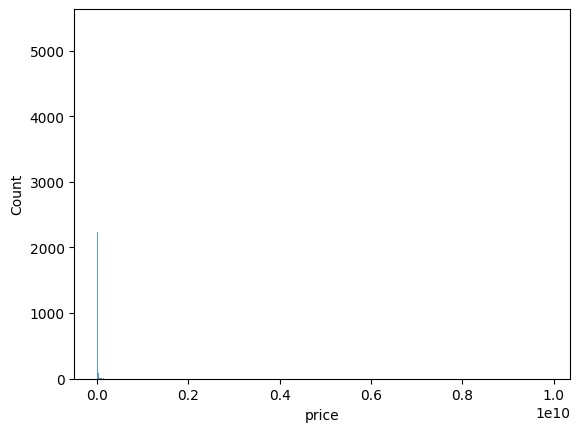

In [4]:
import seaborn as sns

display(data['price'].describe())
display(sns.histplot(data['price']))

count    141362.000000
mean          7.467346
std           5.717144
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          56.000000
Name: floor, dtype: float64

<Axes: xlabel='floor', ylabel='Count'>

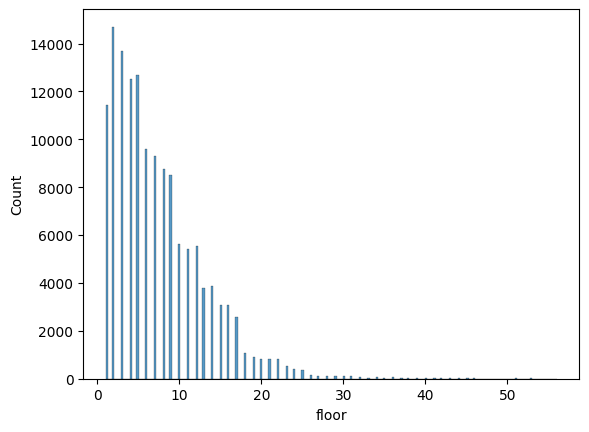

In [6]:
import seaborn as sns

display(num_features['floor'].describe())
display(sns.histplot(num_features['floor']))

count     141362
unique         2
top        False
freq      139990
Name: is_apartment, dtype: object

<Axes: xlabel='is_apartment', ylabel='Count'>

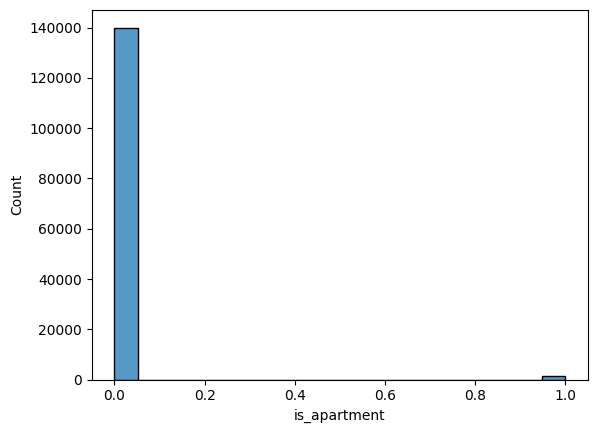

In [7]:
import seaborn as sns

display(bool_features['is_apartment'].describe())
display(sns.histplot(bool_features['is_apartment']))

count    141362.000000
mean          9.001579
std           5.264076
min           0.000000
25%           6.100000
50%           8.800000
75%          10.200000
max         203.000000
Name: kitchen_area, dtype: float64

<Axes: xlabel='kitchen_area', ylabel='Count'>

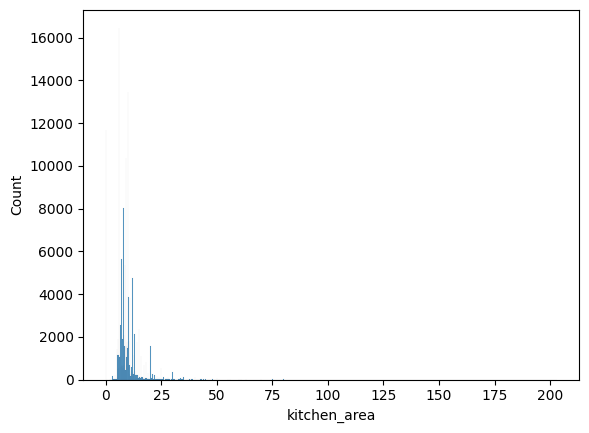

In [8]:
import seaborn as sns

display(num_features['kitchen_area'].describe())
display(sns.histplot(num_features['kitchen_area']))

count    141362.000000
mean         31.056948
std          23.968640
min           0.000000
25%          19.000000
50%          29.400000
75%          41.400002
max         700.000000
Name: living_area, dtype: float64

<Axes: xlabel='living_area', ylabel='Count'>

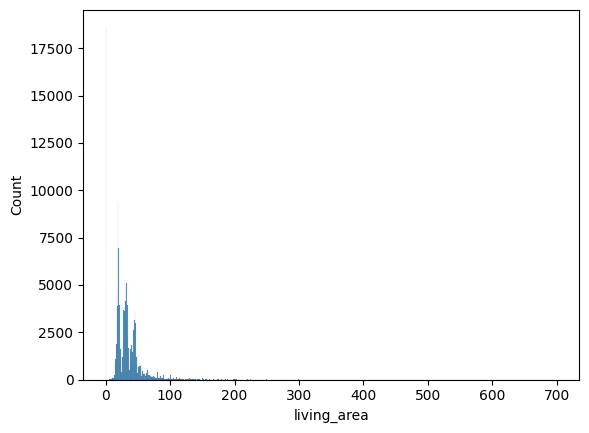

In [9]:
import seaborn as sns

display(num_features['living_area'].describe())
display(sns.histplot(num_features['living_area']))

count    141362.000000
mean          2.129476
std           0.994340
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: rooms, dtype: float64

<Axes: xlabel='rooms', ylabel='Count'>

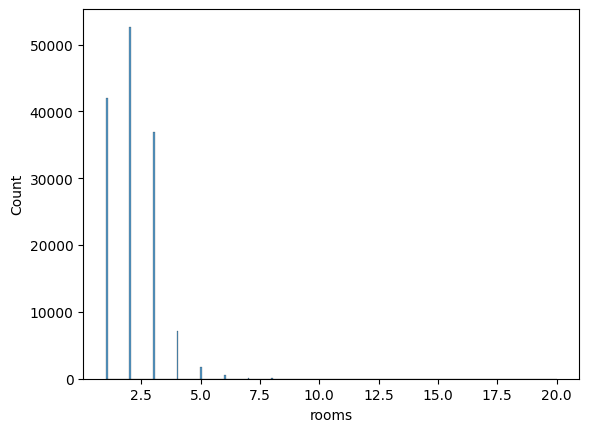

In [10]:
import seaborn as sns

display(num_features['rooms'].describe())
display(sns.histplot(num_features['rooms']))

count    141362.000000
mean         62.374644
std          40.295864
min          11.000000
25%          39.299999
50%          53.000000
75%          72.000000
max         960.299988
Name: total_area, dtype: float64

<Axes: xlabel='total_area', ylabel='Count'>

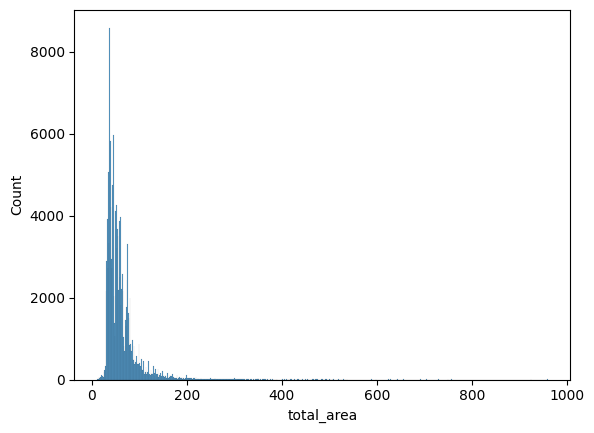

In [11]:
import seaborn as sns

display(num_features['total_area'].describe())
display(sns.histplot(num_features['total_area']))

count    141362.000000
mean       1986.600048
std          22.136409
min        1901.000000
25%        1969.000000
50%        1985.000000
75%        2007.000000
max        2023.000000
Name: build_year, dtype: float64

<Axes: xlabel='build_year', ylabel='Count'>

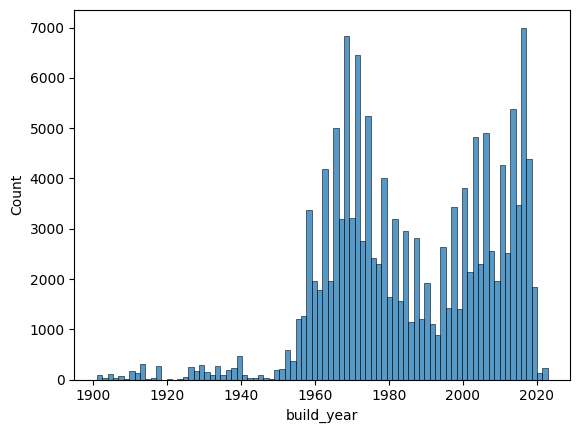

In [12]:
import seaborn as sns

display(num_features['build_year'].describe())
display(sns.histplot(num_features['build_year']))

count    141362.000000
mean         55.730059
std           0.102611
min          55.211460
25%          55.653858
50%          55.724686
75%          55.807323
max          56.011032
Name: latitude, dtype: float64

<Axes: xlabel='latitude', ylabel='Count'>

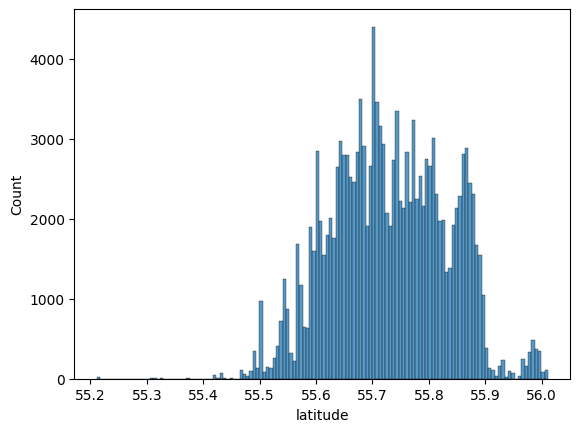

In [13]:
import seaborn as sns

display(num_features['latitude'].describe())
display(sns.histplot(num_features['latitude']))

count    141362.000000
mean         37.589235
std           0.150122
min          36.864372
25%          37.491764
50%          37.581146
75%          37.691055
max          37.946411
Name: longitude, dtype: float64

<Axes: xlabel='longitude', ylabel='Count'>

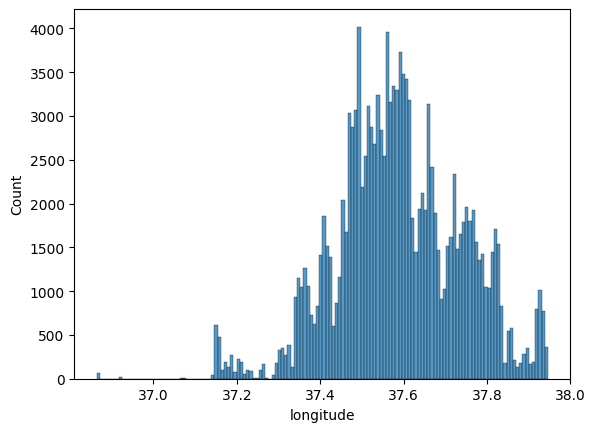

In [14]:
import seaborn as sns

display(num_features['longitude'].describe())
display(sns.histplot(num_features['longitude']))

count    141362.000000
mean          2.753650
std           0.223275
min           2.000000
25%           2.640000
50%           2.640000
75%           2.800000
max          27.000000
Name: ceiling_height, dtype: float64

<Axes: xlabel='ceiling_height', ylabel='Count'>

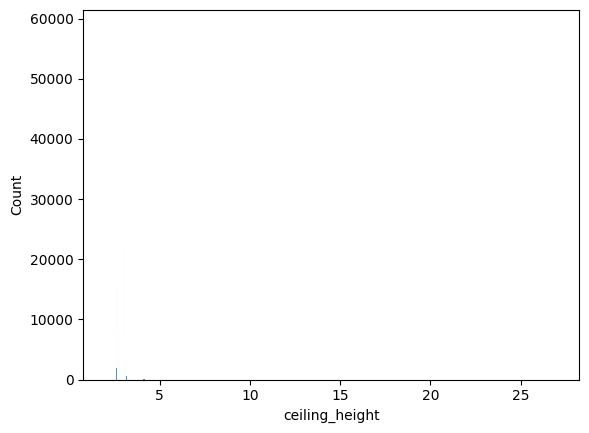

In [15]:
import seaborn as sns

display(num_features['ceiling_height'].describe())
display(sns.histplot(num_features['ceiling_height']))

count    141362.000000
mean        251.993230
std         207.336169
min           1.000000
25%         111.000000
50%         200.000000
75%         324.000000
max        4455.000000
Name: flats_count, dtype: float64

<Axes: xlabel='flats_count', ylabel='Count'>

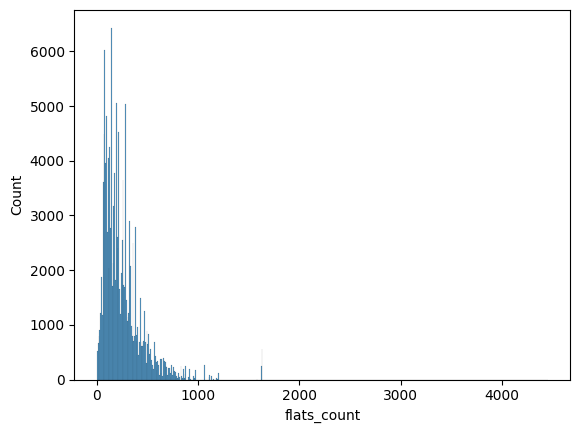

In [16]:
import seaborn as sns

display(num_features['flats_count'].describe())
display(sns.histplot(num_features['flats_count']))

count    141362.000000
mean         14.107554
std           6.898045
min           1.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          99.000000
Name: floors_total, dtype: float64

<Axes: xlabel='floors_total', ylabel='Count'>

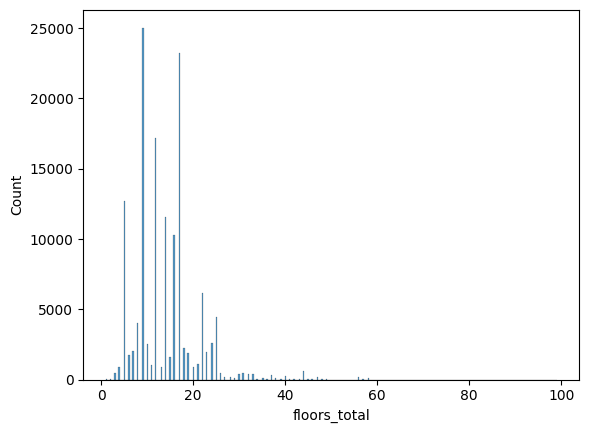

In [17]:
import seaborn as sns

display(num_features['floors_total'].describe())
display(sns.histplot(num_features['floors_total']))

count     141362
unique         2
top         True
freq      126856
Name: has_elevator, dtype: object

<Axes: xlabel='has_elevator', ylabel='Count'>

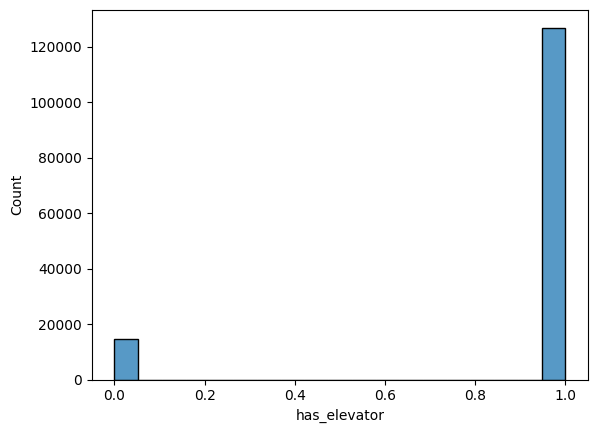

In [18]:
import seaborn as sns

display(bool_features['has_elevator'].describe())
display(sns.histplot(bool_features['has_elevator']))

count    141362.000000
mean          3.232941
std           1.459461
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: building_type_int, dtype: float64

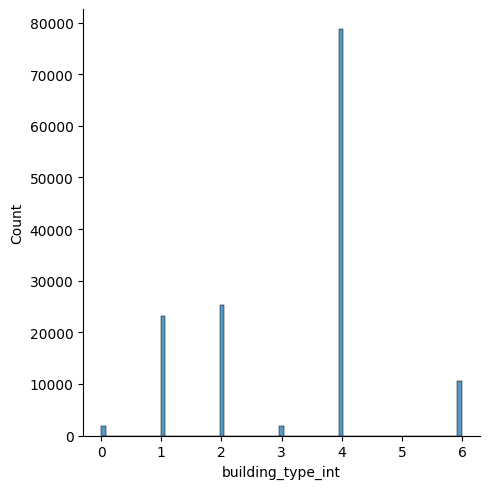

In [20]:
import seaborn as sns

display(cat_features['building_type_int'].describe())
display(sns.displot(cat_features['building_type_int']))

In [ ]:
# Удаляем дубли
feature_cols = data.columns.drop('id').tolist()
is_duplicated_features = data.duplicated(subset=feature_cols, keep=False)

duplicated_ids = data['id'][data['id'].duplicated(keep=False)]

to_drop = is_duplicated_features | data['id'].isin(duplicated_ids)

data = data[~to_drop].reset_index(drop=True)
print(to_drop)

0         False
1         False
2         False
3          True
4         False
          ...  
141357    False
141358    False
141359    False
141360     True
141361    False
Length: 141362, dtype: bool


In [22]:
# Заполняем пропуски
num_cols = data.select_dtypes(include=[float, int]).columns
num_cols = [col for col in num_cols if col not in ['latitude', 'longitude', 'price', 'id', 'building_type_int']]

for col in num_cols:
    # считаем, что 0 и NaN — это пропуски
    mask = (data[col] == 0) | (data[col].isna())
    if mask.any():
        fill_value = data.loc[~mask, col].mean()  # среднее по нормальным значениям
        data.loc[mask, col] = fill_value

In [25]:
# Удаляем выбросы
threshold=1.5
num_cols = data.select_dtypes(include=['float', 'int']).columns
num_cols = [col for col in num_cols if col not in ['latitude', 'longitude', 'price', 'id', 'building_type_int']]
outlier_flags = pd.DataFrame(False, index=data.index, columns=num_cols)

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - threshold * IQR
    upper = Q3 + threshold * IQR
    outlier_flags[col] = ~data[col].between(lower, upper)

rows_with_outliers = outlier_flags.any(axis=1)
data = data[~rows_with_outliers]
print(data)

            id  floor  is_apartment  kitchen_area  living_area  rooms  studio  \
0        36985      6         False           8.0    35.424201      3   False   
1        36986     13         False          12.0    44.000000      3   False   
2        36987     17         False          10.2    35.424201      3   False   
3        36989      7         False          10.0    44.099998      3   False   
4        36990     16         False           9.1    35.424201      2   False   
...        ...    ...           ...           ...          ...    ...     ...   
123931  141025      4         False           9.0    30.000000      2   False   
123932  141026      3         False           8.0    19.000000      1   False   
123933  141028      4         False           6.7    29.000000      2   False   
123934  141029     14         False          10.0    18.000000      1   False   
123936  141032      8         False           6.5    24.000000      2   False   

        total_area     pric